## Relação entre `aspectos relacionados à Saúde` e `Expectativa de Vida `



In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

## Tratando Dados

Importando e Tratando o DataFrame sobre Expectativa de vida, que será o foco do trabalho final

In [1]:
df_expectativa_vida = pd.read_csv('./dataset/expectativa_vida.csv', sep=',')

df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

# Pivotando o dataframe para transformar a coluna 'Period' em colunas separadas para os anos desejados
df_expectativa_vida = df_expectativa_vida.pivot_table(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Period', values='Value').reset_index()

df_expectativa_vida = df_expectativa_vida.rename(columns={
    2000: '2000_expectativa',
    2010: '2010_expectativa',
    2015: '2015_expectativa',
    2019: '2019_expectativa'
})

# Selecionando apenas as colunas desejadas
df_expectativa_vida = df_expectativa_vida[['Indicator', 'ParentLocation', 'Country', 'Dim1', '2000_expectativa', '2010_expectativa', '2015_expectativa', '2019_expectativa']]
df_expectativa_vida.head()




NameError: name 'pd' is not defined

In [100]:
# Separando os dados com base no indicador - Expectativa de vida ao nascer
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()


Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
549,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13
552,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06
555,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43
558,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25
561,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70


In [101]:
# Separando os dados com base no indicador - Expectativa de vida aos 60 anos
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']
df_expectativa_aos_60.head()


Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
6,Life expectancy at age 60 (years),Africa,Benin,Both sexes,16.08,16.69,17.01,17.40
9,Life expectancy at age 60 (years),Africa,Botswana,Both sexes,12.92,15.26,15.89,16.25
12,Life expectancy at age 60 (years),Africa,Burkina Faso,Both sexes,15.52,16.17,16.44,16.82


In [102]:
import pandas as pd

# Carregar o DataFrame a partir do arquivo CSV
df_tabaco = pd.read_csv('./dataset/tobacco_prevalence.csv')

# Selecionar colunas relevantes
df_tabaco = df_tabaco[['Indicator', 'ParentLocation', 'Location', 'Dim1','Period', 'Value']]

# Renomear as colunas
df_tabaco.columns = ['Indicator', 'ParentLocation', 'Country', 'Dim1', 'Year', 'Value']
df_tabaco = df_tabaco[df_tabaco['Year'].isin([2000, 2010, 2015, 2019])]

# Pivotear a coluna 'Year' para 4 colunas com os anos e seus respectivos valores
df_tabaco = df_tabaco.pivot(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Year', values='Value')

# Redefinir o índice
df_tabaco = df_tabaco.reset_index()

# Renomear as colunas
df_tabaco.columns.name = None

# Renomear as colunas dos anos
df_tabaco = df_tabaco.rename(columns={2000: '2000_tabaco', 2010: '2010_tabaco', 2015: '2015_tabaco', 2019: '2019_tabaco'})

# Visualizar o DataFrame pivoteado
df_tabaco.head()


,Indicator,ParentLocation,Country,Dim1,2000_tabaco,2010_tabaco,2015_tabaco,2019_tabaco
0,Estimate of current tobacco smoking prevalence...,Africa,Algeria,Both sexes,16.2,15.6,15.4,15.2
1,Estimate of current tobacco smoking prevalence...,Africa,Algeria,Female,1.7,1.0,0.8,0.6
2,Estimate of current tobacco smoking prevalence...,Africa,Algeria,Male,30.7,30.2,29.9,29.7
3,Estimate of current tobacco smoking prevalence...,Africa,Benin,Both sexes,11.0,7.2,5.8,4.9
4,Estimate of current tobacco smoking prevalence...,Africa,Benin,Female,1.9,1.5,1.3,1.2


## Análise Inicial

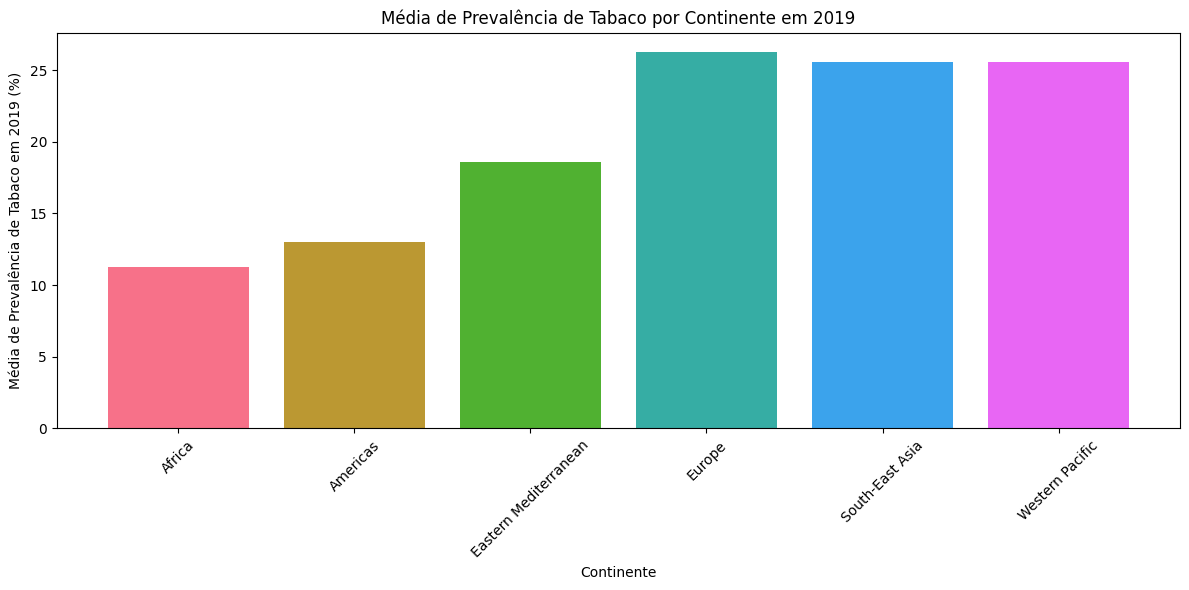

In [103]:

# Filtrar os dados para 2019 e por continente
df_2019_continents = df_tabaco[df_tabaco['ParentLocation'] != 'Global']
df_2019_continents = df_2019_continents[['Country', '2019_tabaco', 'ParentLocation']]

# Agrupar por continente e calcular a média da prevalência de tabaco em 2019
df_2019_avg_by_continent = df_2019_continents.groupby('ParentLocation')['2019_tabaco'].mean().reset_index()

# Definir uma paleta de cores
colors = sns.color_palette('husl', n_colors=len(df_2019_avg_by_continent))

# Plotar o gráfico de barras com cores distintas para cada continente
plt.figure(figsize=(12, 6))
plt.bar(df_2019_avg_by_continent['ParentLocation'], df_2019_avg_by_continent['2019_tabaco'], color=colors)
plt.xlabel('Continente')
plt.ylabel('Média de Prevalência de Tabaco em 2019 (%)')
plt.title('Média de Prevalência de Tabaco por Continente em 2019')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


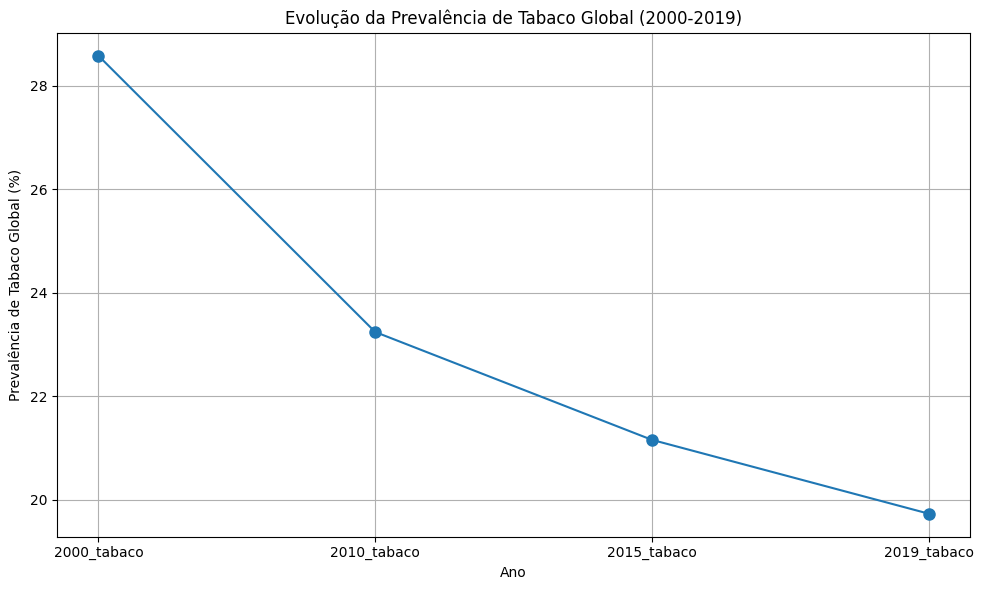

In [104]:
# Calcular a média global da prevalência de tabaco ao longo dos anos
global_prevalence = df_tabaco[['2000_tabaco', '2010_tabaco', '2015_tabaco', '2019_tabaco']].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(global_prevalence.index, global_prevalence.values, marker='o', linestyle='-', markersize=8)
plt.xlabel('Ano')
plt.ylabel('Prevalência de Tabaco Global (%)')
plt.title('Evolução da Prevalência de Tabaco Global (2000-2019)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlacionando Dados

**Criando um DF que correlaciona o uso de tabaco e a expectativa de Vida**

In [105]:
# Realizar a junção dos DataFrames utilizando as colunas-chave 'Country', 'ParentLocation' e 'Dim1'
df_exp_nasc_e_tabaco = df_tabaco.merge(df_expectativa_ao_nascer, on=['Country', 'ParentLocation', 'Dim1'], how='inner')

df_exp_nasc_e_tabaco = df_exp_nasc_e_tabaco.drop(columns=['Indicator_y'])

df_exp_nasc_e_tabaco = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['Indicator_x'] == 'Estimate of current tobacco use prevalence (%) (age-standardized rate)']
# Visualizar o DataFrame resultante
df_exp_nasc_e_tabaco.head()



,Indicator_x,ParentLocation,Country,Dim1,2000_tabaco,2010_tabaco,2015_tabaco,2019_tabaco,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
1,Estimate of current tobacco use prevalence (%)...,Africa,Algeria,Both sexes,22.2,21.5,21.1,21.0,72.21,75.85,76.54,77.13
3,Estimate of current tobacco use prevalence (%)...,Africa,Benin,Both sexes,16.7,10.7,8.6,7.2,56.59,60.47,61.96,63.43
5,Estimate of current tobacco use prevalence (%)...,Africa,Botswana,Both sexes,33.2,24.8,21.7,19.8,45.59,58.14,60.93,62.25
7,Estimate of current tobacco use prevalence (%)...,Africa,Burkina Faso,Both sexes,29.8,20.5,17.0,14.9,51.64,58.59,60.92,62.70
9,Estimate of current tobacco use prevalence (%)...,Africa,Burundi,Both sexes,24.0,16.6,13.9,12.2,43.78,58.60,62.05,63.84


**Etapa 1: Análise Descritiva**

Nesta etapa, realizaremos uma análise descritiva dos dois indicadores e visualizaremos sua distribuição.

In [106]:
# Etapa 1: Análise Descritiva

# Estatísticas descritivas da prevalência de tabaco
desc_tabaco = df_exp_nasc_e_tabaco.filter(like='_tabaco').describe()

# Estatísticas descritivas da expectativa de vida ao nascer
desc_expectativa = df_exp_nasc_e_tabaco.filter(like='_expectativa').describe()

# Organize o output
desc_tabaco = desc_tabaco.transpose()
desc_tabaco.index = [int(col.split('_')[0]) for col in desc_tabaco.index]
desc_tabaco.columns = ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']

desc_expectativa = desc_expectativa.transpose()
desc_expectativa.index = [int(col.split('_')[0]) for col in desc_expectativa.index]
desc_expectativa.columns = ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']

desc_tabaco, desc_expectativa


(      Contagem      Média  Desvio Padrão  Mínimo     25%   50%     75%  Máximo
 2000     158.0  29.667089      12.384598     6.8  20.700  29.8  36.225    68.5
 2010     158.0  24.031013      10.350432     4.9  15.650  24.8  30.750    54.6
 2015     158.0  21.826582       9.857859     4.2  13.525  22.4  28.050    48.8
 2019     158.0  20.324051       9.622164     3.6  12.100  20.7  26.125    45.1,
       Contagem      Média  Desvio Padrão  Mínimo      25%     50%      75%  \
 2000     158.0  67.078671       9.923619   43.78  60.0125  70.720  74.5225   
 2010     158.0  70.398038       8.843677   31.28  64.5825  72.950  76.6875   
 2015     158.0  72.051139       7.598984   47.67  66.5425  73.225  77.8125   
 2019     158.0  73.066139       7.086252   50.75  67.3525  74.125  78.4875   
 
       Máximo  
 2000   81.12  
 2010   82.68  
 2015   83.62  
 2019   84.26  )

**Etapa 2: Visualização da Relação**

Nesta etapa, criaremos um gráfico de dispersão para visualizar a relação entre a prevalência do uso de tabaco e a expectativa de vida ao nascer ao longo dos anos.

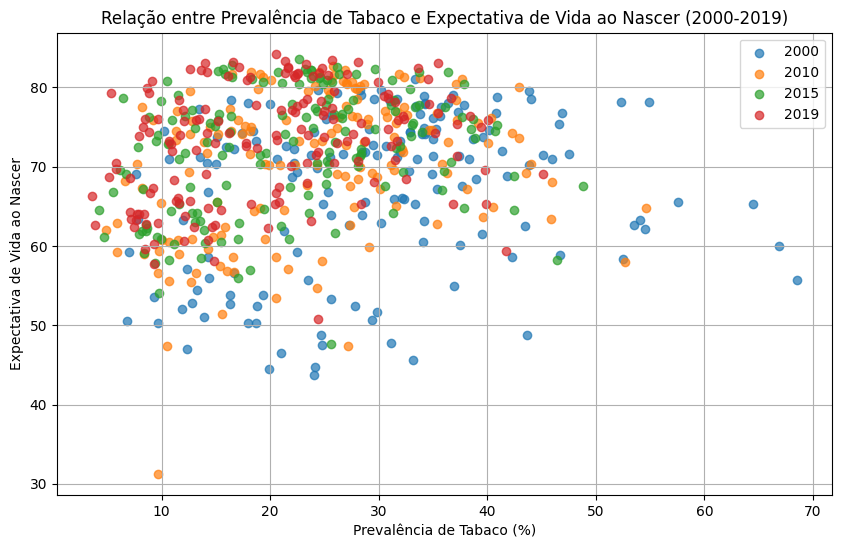

In [107]:
# Etapa 2: Visualização da Relação

plt.figure(figsize=(10, 6))
years = [2000, 2010, 2015, 2019]

for year in years:
    plt.scatter(df_exp_nasc_e_tabaco[f'{year}_tabaco'], df_exp_nasc_e_tabaco[f'{year}_expectativa'], alpha=0.7, label=year)

plt.xlabel('Prevalência de Tabaco (%)')
plt.ylabel('Expectativa de Vida ao Nascer')
plt.title('Relação entre Prevalência de Tabaco e Expectativa de Vida ao Nascer (2000-2019)')
plt.legend()
plt.grid(True)
plt.show()


### **Etapa 3: Teste de Hipótese**

Para realizar um teste de hipótese, você definiremos uma hipótese nula (H0) e uma hipótese alternativa (H1) com base na pergunta de pesquisa. Vamos supor que você deseja testar se a média da expectativa de vida ao nascer é diferente entre os anos de 2000 e 2019 para os grupos com alta e baixa prevalência de tabaco.

#### Teste de Hipótese para todos os anos

Nas próximas células, realizaremos um teste t independente para comparar as médias de expectativa de vida entre grupos com alta e baixa prevalência de tabaco de 2000, 2010, 2015 e 2019 e informaremos qual hipótese foi aceita.

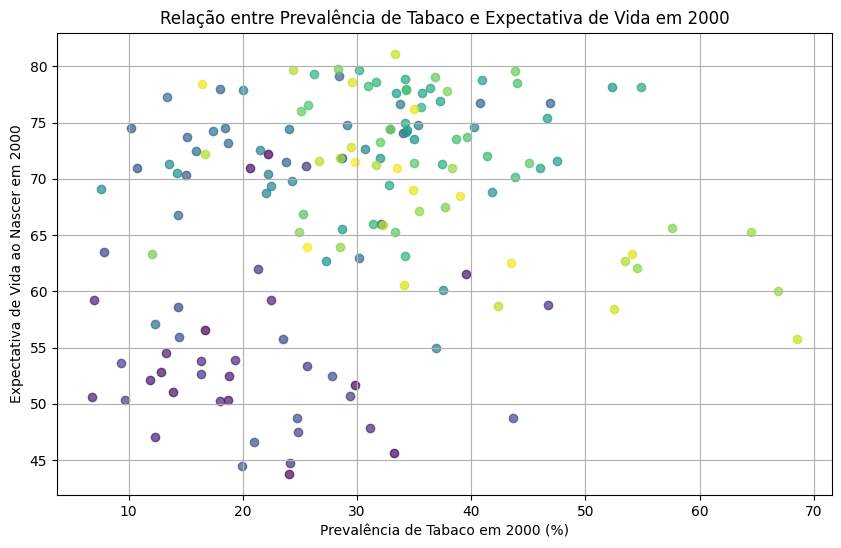

(3.7813685228086933, 0.0002217165389297721, 'Rejeitar a hipótese nula')

In [108]:
import numpy as np
# Teste de Hipótese para 2000
tabaco_alto_2000 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2000_tabaco'] >= df_exp_nasc_e_tabaco['2000_tabaco'].median()]
tabaco_baixo_2000 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2000_tabaco'] < df_exp_nasc_e_tabaco['2000_tabaco'].median()]

t_stat_2000, p_value_2000 = stats.ttest_ind(tabaco_alto_2000['2000_expectativa'], tabaco_baixo_2000['2000_expectativa'])

# Aceitar ou rejeitar a hipótese nula com base no valor de p
alpha = 0.05  # Nível de significância de 0.05

if p_value_2000 < alpha:
    conclusao_2000 = "Rejeitar a hipótese nula"
else:
    conclusao_2000 = "Aceitar a hipótese nula"

# Cores diferentes para cada país
unique_countries = df_exp_nasc_e_tabaco['Country'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_countries)))

# Gráfico de Dispersão para 2000 com cores diferentes para cada país
plt.figure(figsize=(10, 6))
for i, country in enumerate(unique_countries):
    country_data = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['Country'] == country]
    plt.scatter(country_data['2000_tabaco'], country_data['2000_expectativa'], alpha=0.7, label=country, color=colors[i])

plt.xlabel('Prevalência de Tabaco em 2000 (%)')
plt.ylabel('Expectativa de Vida ao Nascer em 2000')
plt.title('Relação entre Prevalência de Tabaco e Expectativa de Vida em 2000')
plt.grid(True)
plt.show()

t_stat_2000, p_value_2000, conclusao_2000


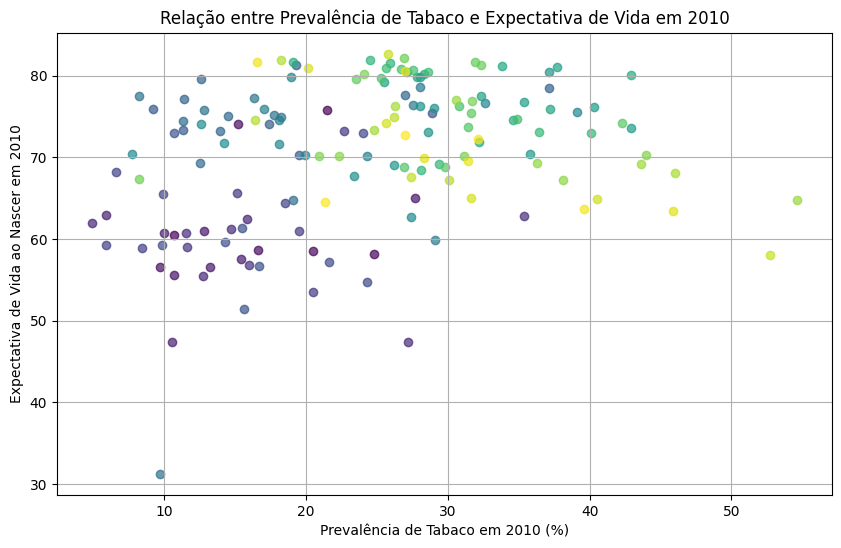

(4.375710621455829, 2.20593335167292e-05, 'Rejeitar a hipótese nula')

In [109]:
# Teste de Hipótese para 2010
tabaco_alto_2010 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2010_tabaco'] >= df_exp_nasc_e_tabaco['2010_tabaco'].median()]
tabaco_baixo_2010 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2010_tabaco'] < df_exp_nasc_e_tabaco['2010_tabaco'].median()]

t_stat_2010, p_value_2010 = stats.ttest_ind(tabaco_alto_2010['2010_expectativa'], tabaco_baixo_2010['2010_expectativa'])

# Aceitar ou rejeitar a hipótese nula com base no valor de p
alpha = 0.05  # Nível de significância de 0.05

if p_value_2010 < alpha:
    conclusao_2010 = "Rejeitar a hipótese nula"
else:
    conclusao_2010 = "Aceitar a hipótese nula"

# Cores diferentes para cada país
unique_countries = df_exp_nasc_e_tabaco['Country'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_countries)))

# Gráfico de Dispersão para 2010 com cores diferentes para cada país
plt.figure(figsize=(10, 6))
for i, country in enumerate(unique_countries):
    country_data = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['Country'] == country]
    plt.scatter(country_data['2010_tabaco'], country_data['2010_expectativa'], alpha=0.7, label=country, color=colors[i])

plt.xlabel('Prevalência de Tabaco em 2010 (%)')
plt.ylabel('Expectativa de Vida ao Nascer em 2010')
plt.title('Relação entre Prevalência de Tabaco e Expectativa de Vida em 2010')
plt.grid(True)
plt.show()

t_stat_2010, p_value_2010, conclusao_2010


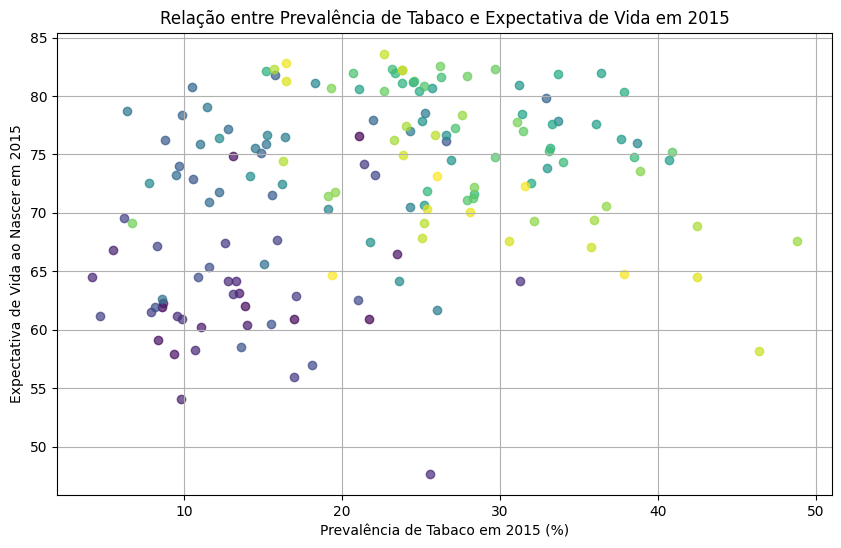

(4.40138569736383, 1.9860269377312265e-05, 'Rejeitar a hipótese nula')

In [110]:
# Teste de Hipótese para 2015
tabaco_alto_2015 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2015_tabaco'] >= df_exp_nasc_e_tabaco['2015_tabaco'].median()]
tabaco_baixo_2015 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2015_tabaco'] < df_exp_nasc_e_tabaco['2015_tabaco'].median()]

t_stat_2015, p_value_2015 = stats.ttest_ind(tabaco_alto_2015['2015_expectativa'], tabaco_baixo_2015['2015_expectativa'])

# Aceitar ou rejeitar a hipótese nula com base no valor de p
alpha = 0.05  # Nível de significância de 0.05

if p_value_2015 < alpha:
    conclusao_2015 = "Rejeitar a hipótese nula"
else:
    conclusao_2015 = "Aceitar a hipótese nula"

# Cores diferentes para cada país
unique_countries = df_exp_nasc_e_tabaco['Country'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_countries)))

# Gráfico de Dispersão para 2015 com cores diferentes para cada país
plt.figure(figsize=(10, 6))
for i, country in enumerate(unique_countries):
    country_data = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['Country'] == country]
    plt.scatter(country_data['2015_tabaco'], country_data['2015_expectativa'], alpha=0.7, label=country, color=colors[i])

plt.xlabel('Prevalência de Tabaco em 2015 (%)')
plt.ylabel('Expectativa de Vida ao Nascer em 2015')
plt.title('Relação entre Prevalência de Tabaco e Expectativa de Vida em 2015')
plt.grid(True)
plt.show()

t_stat_2015, p_value_2015, conclusao_2015


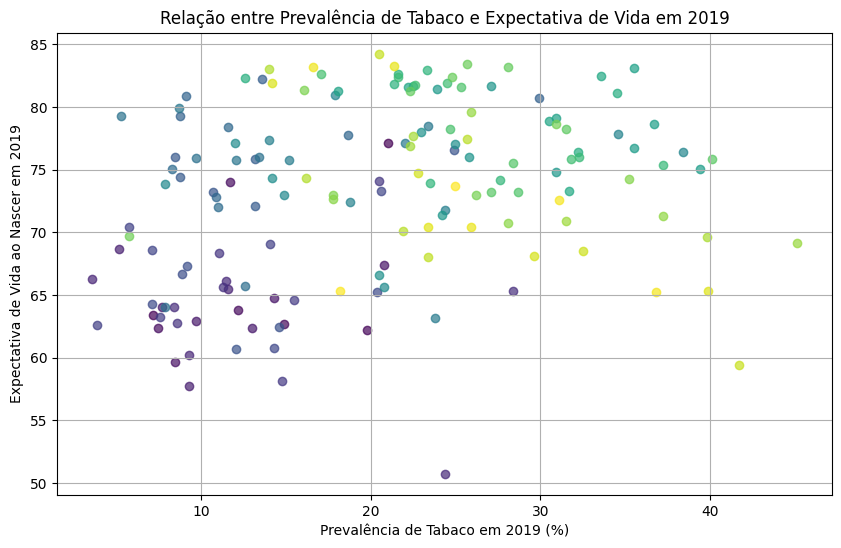

(4.237649499852205, 3.851419992759614e-05, 'Rejeitar a hipótese nula')

In [111]:
# Teste de Hipótese para 2019
tabaco_alto_2019 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2019_tabaco'] >= df_exp_nasc_e_tabaco['2019_tabaco'].median()]
tabaco_baixo_2019 = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['2019_tabaco'] < df_exp_nasc_e_tabaco['2019_tabaco'].median()]

t_stat_2019, p_value_2019 = stats.ttest_ind(tabaco_alto_2019['2019_expectativa'], tabaco_baixo_2019['2019_expectativa'])

# Aceitar ou rejeitar a hipótese nula com base no valor de p
alpha = 0.05  # Nível de significância de 0.05

if p_value_2019 < alpha:
    conclusao_2019 = "Rejeitar a hipótese nula"
else:
    conclusao_2019 = "Aceitar a hipótese nula"

# Cores diferentes para cada país
unique_countries = df_exp_nasc_e_tabaco['Country'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_countries)))

# Gráfico de Dispersão para 2019 com cores diferentes para cada país
plt.figure(figsize=(10, 6))
for i, country in enumerate(unique_countries):
    country_data = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['Country'] == country]
    plt.scatter(country_data['2019_tabaco'], country_data['2019_expectativa'], alpha=0.7, label=country, color=colors[i])

plt.xlabel('Prevalência de Tabaco em 2019 (%)')
plt.ylabel('Expectativa de Vida ao Nascer em 2019')
plt.title('Relação entre Prevalência de Tabaco e Expectativa de Vida em 2019')
plt.grid(True)
plt.show()

t_stat_2019, p_value_2019, conclusao_2019


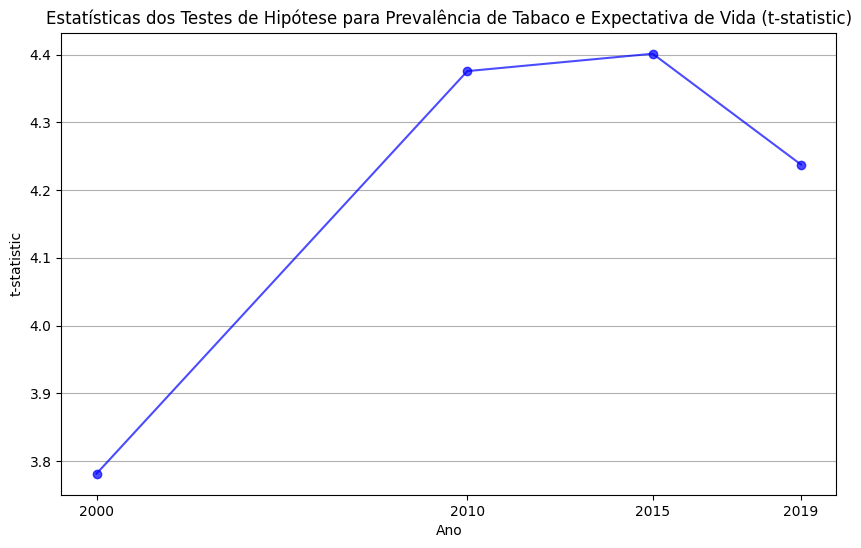

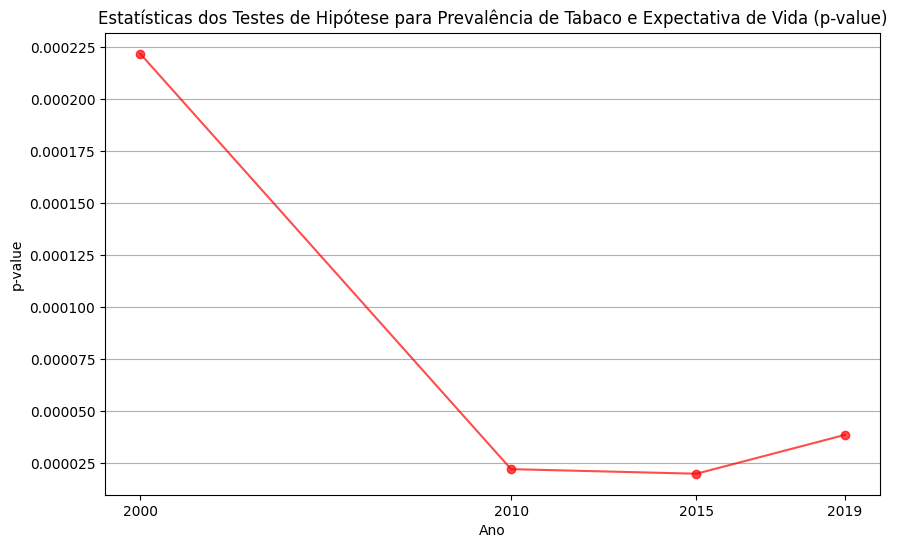

,Ano,t-statistic,p-value
0,2000,3.781369,0.000222
1,2010,4.375711,0.000022
2,2015,4.401386,0.000020
3,2019,4.237649,0.000039


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Resultados dos testes de hipótese para cada ano
anos = [2000, 2010, 2015, 2019]
t_stats = []
p_values = []

for ano in anos:
    tabaco_alto = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco[f'{ano}_tabaco'] >= df_exp_nasc_e_tabaco[f'{ano}_tabaco'].median()]
    tabaco_baixo = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco[f'{ano}_tabaco'] < df_exp_nasc_e_tabaco[f'{ano}_tabaco'].median()]

    t_stat, p_value = stats.ttest_ind(tabaco_alto[f'{ano}_expectativa'], tabaco_baixo[f'{ano}_expectativa'])
    t_stats.append(t_stat)
    p_values.append(p_value)

# Criar um DataFrame com os resultados
resultados_df = pd.DataFrame({'Ano': anos, 't-statistic': t_stats, 'p-value': p_values})

# Gráfico de linhas para t-statistic
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Ano'], resultados_df['t-statistic'], marker='o', color='b', alpha=0.7)
plt.xticks(anos)
plt.xlabel('Ano')
plt.ylabel('t-statistic')
plt.title('Estatísticas dos Testes de Hipótese para Prevalência de Tabaco e Expectativa de Vida (t-statistic)')
plt.grid(axis='y')
plt.show()

# Gráfico de linhas para p-value
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Ano'], resultados_df['p-value'], marker='o', color='r', alpha=0.7)
plt.xticks(anos)
plt.xlabel('Ano')
plt.ylabel('p-value')
plt.title('Estatísticas dos Testes de Hipótese para Prevalência de Tabaco e Expectativa de Vida (p-value)')
plt.grid(axis='y')
plt.show()

resultados_df



**Etapa 4: Cálculo dos Intervalos de Confiança**

Calcule o intervalo de confiança para a média da expectativa de vida ao nascer.

In [113]:
# Etapa 4: Cálculo dos Intervalos de Confiança


# Nível de confiança desejado (por exemplo, 95%)
conf_level = 0.95

# Lista de anos
years = [2000, 2010, 2015, 2019]

# Dicionário para armazenar os intervalos de confiança
confidence_intervals = {}

for year in years:
    # Média e desvio padrão da expectativa de vida
    mean_expectativa = df_exp_nasc_e_tabaco[f'{year}_expectativa'].mean()
    std_expectativa = df_exp_nasc_e_tabaco[f'{year}_expectativa'].std()
    
    # Tamanho da amostra
    sample_size = len(df_exp_nasc_e_tabaco)
    
    # Cálculo do erro padrão
    std_error = std_expectativa / (sample_size ** 0.5)
    
    # Cálculo do valor crítico (z-score) com base no nível de confiança
    z = norm.ppf(1 - (1 - conf_level) / 2)
    
    # Cálculo do intervalo de confiança
    lower_bound = mean_expectativa - z * std_error
    upper_bound = mean_expectativa + z * std_error
    
    confidence_intervals[year] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}

confidence_intervals


{2000: {'Lower Bound': 65.53131711228035, 'Upper Bound': 68.62602465987156},
 2010: {'Lower Bound': 69.01907551631056, 'Upper Bound': 71.77700043305653},
 2015: {'Lower Bound': 70.86625734518813, 'Upper Bound': 73.23602113582456},
 2019: {'Lower Bound': 71.96120580838998, 'Upper Bound': 74.17107267262269}}

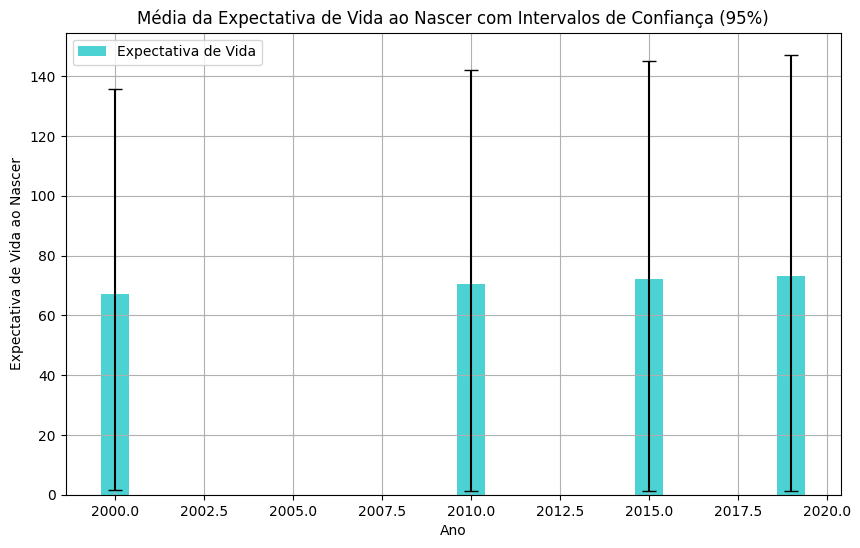

In [114]:
import matplotlib.pyplot as plt

# Anos e ICs
years = [2000, 2010, 2015, 2019]
lower_bounds = [confidence_intervals[year]['Lower Bound'] for year in years]
upper_bounds = [confidence_intervals[year]['Upper Bound'] for year in years]
mean_expectativa = [df_exp_nasc_e_tabaco[f'{year}_expectativa'].mean() for year in years]

# Filtrar anos com valores não zerados
non_zero_years = [year for year, mean in zip(years, mean_expectativa) if mean != 0]
non_zero_lower_bounds = [lower for lower, mean in zip(lower_bounds, mean_expectativa) if mean != 0]
non_zero_upper_bounds = [upper for upper, mean in zip(upper_bounds, mean_expectativa) if mean != 0]

# Configuração do gráfico de barras com barras de erro
plt.figure(figsize=(10, 6))
plt.bar(non_zero_years, [mean for mean in mean_expectativa if mean != 0], 
        yerr=[non_zero_lower_bounds, non_zero_upper_bounds], capsize=5, color='c', alpha=0.7, label='Expectativa de Vida')

# Configurações adicionais
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida ao Nascer')
plt.title('Média da Expectativa de Vida ao Nascer com Intervalos de Confiança (95%)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


**Etapa 5: Cálculo da Correlação nos anos analisados**


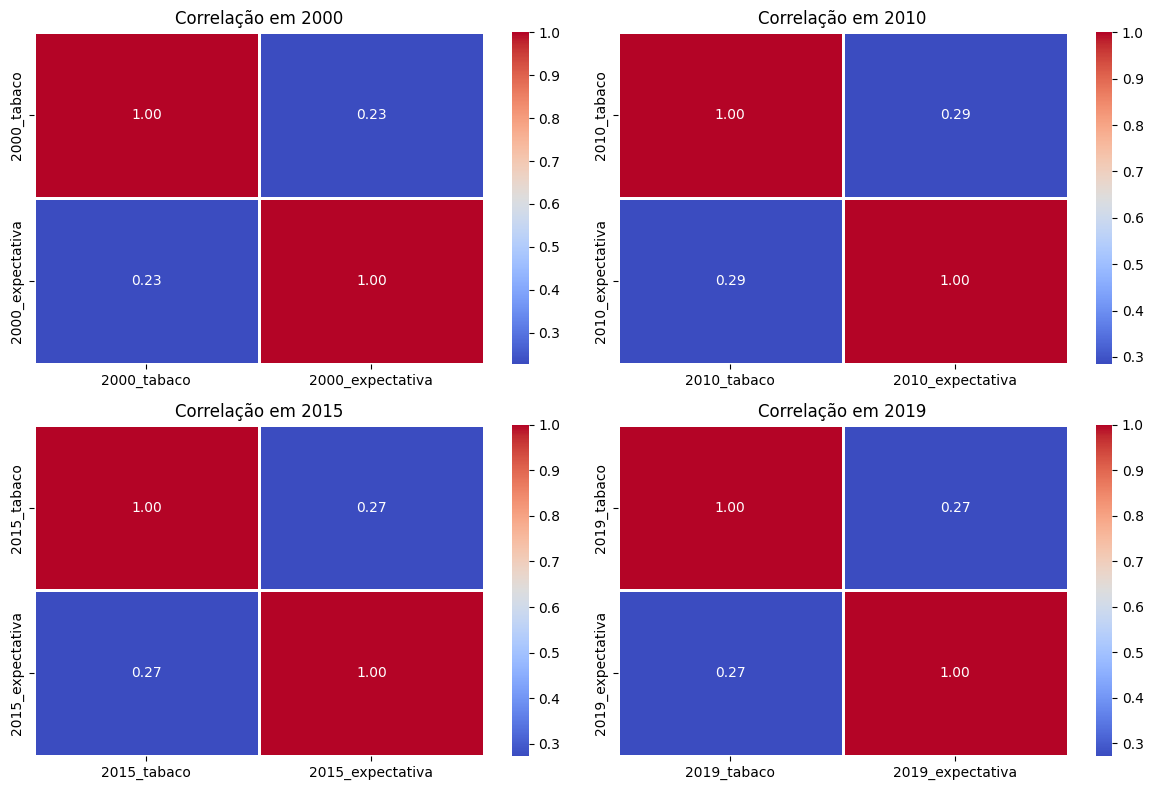

In [115]:
# Correlação para o ano 2000
correlacao_2000 = df_exp_nasc_e_tabaco[['2000_tabaco', '2000_expectativa']].corr()

# Correlação para o ano 2010
correlacao_2010 = df_exp_nasc_e_tabaco[['2010_tabaco', '2010_expectativa']].corr()

# Correlação para o ano 2015
correlacao_2015 = df_exp_nasc_e_tabaco[['2015_tabaco', '2015_expectativa']].corr()

# Correlação para o ano 2019
correlacao_2019 = df_exp_nasc_e_tabaco[['2019_tabaco', '2019_expectativa']].corr()

# Plotar as matrizes de correlação como gráficos de calor (heatmaps)
import seaborn as sns
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.heatmap(correlacao_2000, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlação em 2000')

plt.subplot(222)
sns.heatmap(correlacao_2010, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlação em 2010')

plt.subplot(223)
sns.heatmap(correlacao_2015, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlação em 2015')

plt.subplot(224)
sns.heatmap(correlacao_2019, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlação em 2019')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlação')

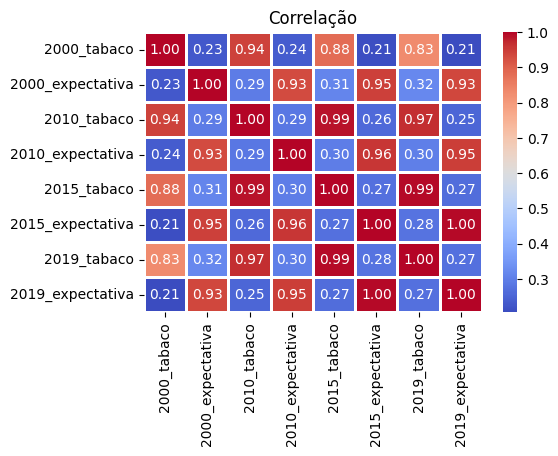

In [116]:
#correlação para todos os anos 

correlacao = df_exp_nasc_e_tabaco[['2000_tabaco', '2000_expectativa', '2010_tabaco', '2010_expectativa', '2015_tabaco', '2015_expectativa', '2019_tabaco', '2019_expectativa']].corr()

# Plotar as matrizes de correlação como gráficos de calor (heatmaps)
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlação')


## Regressor Linear

In [117]:
#Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar os dados
df_exp_nasc_e_tabaco_scaled = scaler.fit_transform(df_exp_nasc_e_tabaco[['2000_tabaco', '2000_expectativa', '2010_tabaco', '2010_expectativa', '2015_tabaco', '2015_expectativa', '2019_tabaco', '2019_expectativa']])
df_exp_nasc_e_tabaco_scaled = pd.DataFrame(df_exp_nasc_e_tabaco_scaled, columns=['2000_tabaco', '2000_expectativa', '2010_tabaco', '2010_expectativa', '2015_tabaco', '2015_expectativa', '2019_tabaco', '2019_expectativa'])

# Visualizar os dados normalizados
df_exp_nasc_e_tabaco_scaled.head()


,2000_tabaco,2000_expectativa,2010_tabaco,2010_expectativa,2015_tabaco,2015_expectativa,2019_tabaco,2019_expectativa
0,0.249595,0.761382,0.334004,0.867121,0.378924,0.803060,0.419277,0.787228
1,0.160454,0.343064,0.116700,0.567899,0.098655,0.397497,0.086747,0.378395
2,0.427877,0.048473,0.400402,0.522568,0.392377,0.368846,0.390361,0.343181
3,0.372771,0.210498,0.313883,0.531323,0.286996,0.368567,0.272289,0.356610
4,0.278768,0.000000,0.235412,0.531518,0.217489,0.400000,0.207229,0.390630


Equação da reta: y = 0.2620032444224608 * x + 0.5805185046190943
R2: 0.06427091078211888


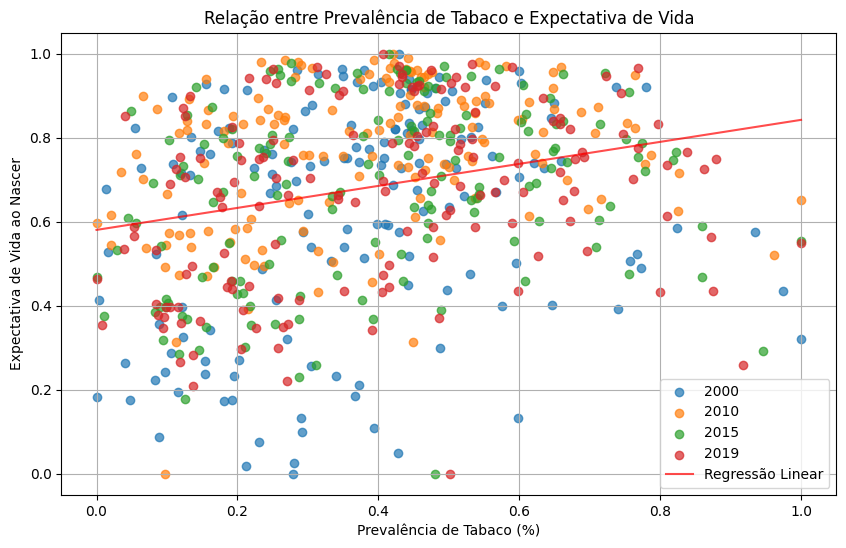

In [118]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Anos
years = [2000, 2010, 2015, 2019]

# Dados de treino
X_train = []
y_train = []

for year in years:
    X_train.append(df_exp_nasc_e_tabaco_scaled[f'{year}_tabaco'].values.reshape(-1, 1))
    y_train.append(df_exp_nasc_e_tabaco_scaled[f'{year}_expectativa'].values.reshape(-1, 1))

# Concatenar os dados
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Treinar o modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

#imprimir a equação da reta
print(f'Equação da reta: y = {regression_model.coef_[0][0]} * x + {regression_model.intercept_[0]}')

# Calcular o coeficiente de determinação (R2)
r2 = regression_model.score(X_train, y_train)
print(f'R2: {r2}')

# Calcular o erro padrão residual
y_predicted = regression_model.predict(X_train)
residuals = y_train - y_predicted



# Plotar os dados
plt.figure(figsize=(10, 6))
for year in years:
    plt.scatter(df_exp_nasc_e_tabaco_scaled[f'{year}_tabaco'], df_exp_nasc_e_tabaco_scaled[f'{year}_expectativa'], alpha=0.7, label=str(year))

# Plotar a linha de regressão linear
x_range = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
plt.plot(x_range, regression_model.predict(x_range), color='r', alpha=0.7, label='Regressão Linear')

# Configurações adicionais
plt.xlabel('Prevalência de Tabaco (%)')
plt.ylabel('Expectativa de Vida ao Nascer')
plt.title('Relação entre Prevalência de Tabaco e Expectativa de Vida')
plt.legend()
plt.grid(True)

plt.show()


In [125]:
# Calcular ICs para os coeficientes e para r2

# Nível de confiança desejado (por exemplo, 95%)
conf_level = 0.95

# Tamanho da amostra
sample_size = len(X_train)

# Cálculo do erro padrão
std_error = np.sqrt(np.sum(residuals ** 2) / (sample_size - 2))

# Cálculo do valor crítico (z-score) com base no nível de confiança
z = norm.ppf(1 - (1 - conf_level) / 2)

# Cálculo do intervalo de confiança para os coeficientes
lower_bound_coef = regression_model.coef_[0][0] - z * std_error
upper_bound_coef = regression_model.coef_[0][0] + z * std_error

# Cálculo do intervalo de confiança para o intercepto
lower_bound_intercept = regression_model.intercept_[0] - z * std_error
upper_bound_intercept = regression_model.intercept_[0] + z * std_error

# Calculo do intervalo de confiança para o R2
lower_bound_r2 = r2 - z * std_error
upper_bound_r2 = r2 + z * std_error


# Imprimir os resultados
print(f'Intervalo de Confiança para o Coeficiente: [{lower_bound_coef}, {upper_bound_coef}]')
print(f'Intervalo de Confiança para o Intercepto: [{lower_bound_intercept}, {upper_bound_intercept}]')
print(f'Intervalo de Confiança para o R2: [{lower_bound_r2}, {upper_bound_r2}]')




Intervalo de Confiança para o Coeficiente: [-0.16082670466324261, 0.6848331935081642]
Intervalo de Confiança para o Intercepto: [0.15768855553339084, 1.0033484537047976]
Intervalo de Confiança para o R2: [-0.35855903830358454, 0.4871008598678223]
